In [1]:
#importing the libraries we will need
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
!pip install pydot
!pip install graphviz
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np
from graphviz import Source
from sklearn import tree
from IPython.display import SVG
import matplotlib.pyplot as plt 




         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.         

In [2]:
#loading the datasets we will need
all_football_18 = pd.read_csv('/project/all_football_18.csv', index_col=0)
ranking_table = pd.read_csv("/project/ranking_table.csv", index_col=0)


In [7]:
all_football_18.head()
ranking_table.head()

,country_name,Final_positional_ranking,goal,shotsPerGame,yellow_card,red_card,possession_percentage,passSuccess_percentage,shotOnTargetPG,dribbleWonPG,...,keyPassShort,left_side,middle_side,right_side,own_third,middle_third,opposition_third,shot_left_side,shot_middle_side,shot_right_side
0,Argentina,16,6,13.8,11,0,61.1,85.0,4.5,13.5,...,8.8,38%,27%,35%,19%,49%,32%,27%,49%,24%
1,Australia,25,2,11.0,7,0,50.9,83.7,2.3,11.0,...,6.3,35%,20%,45%,27%,47%,25%,9%,79%,12%
2,Belgium,3,16,15.1,11,0,52.1,86.3,5.7,13.3,...,10.6,34%,26%,40%,27%,47%,26%,26%,56%,18%
3,Brazil,5,8,20.8,7,0,56.8,87.9,8.0,14.8,...,13.0,43%,29%,29%,25%,44%,31%,28%,60%,13%
4,Colombia,10,6,9.8,9,1,50.2,79.9,3.3,7.8,...,5.0,33%,22%,45%,29%,48%,23%,7%,66%,27%


,country_name,Final_positional_ranking,Ranking_after_analysis,goal,possession_percentage,stat-value,passLongBallInaccurate,shortPassAccurate,keyPassShort
10,France,1,3,14,49.6,6.93,25.7,322.0,7.4
6,Croatia,2,2,14,55.4,6.80,29.6,368.3,7.4
2,Belgium,3,1,16,52.1,7.06,21.9,420.3,10.6
9,England,4,4,12,53.5,6.82,27.3,399.6,6.6
3,Brazil,5,6,8,56.8,7.06,12.0,466.2,13.0


In [4]:
ranking_table_X = ranking_table[["possession_percentage",
                                 "goal",
                                 "passLongBallInaccurate",
                                 "shortPassAccurate","keyPassShort"]]

ranking_table_y = ranking_table.country_name

tree_clf = DecisionTreeClassifier(max_depth=5, random_state = 1)
#by adding a random_state is to make the outcome consistent across calls
# otherwise, we would have had different outputs as it's random 
clf = tree_clf.fit(ranking_table_X, ranking_table_y)
clf


DecisionTreeClassifier(max_depth=5, random_state=1)

Decision tree finds the best splits at each node!

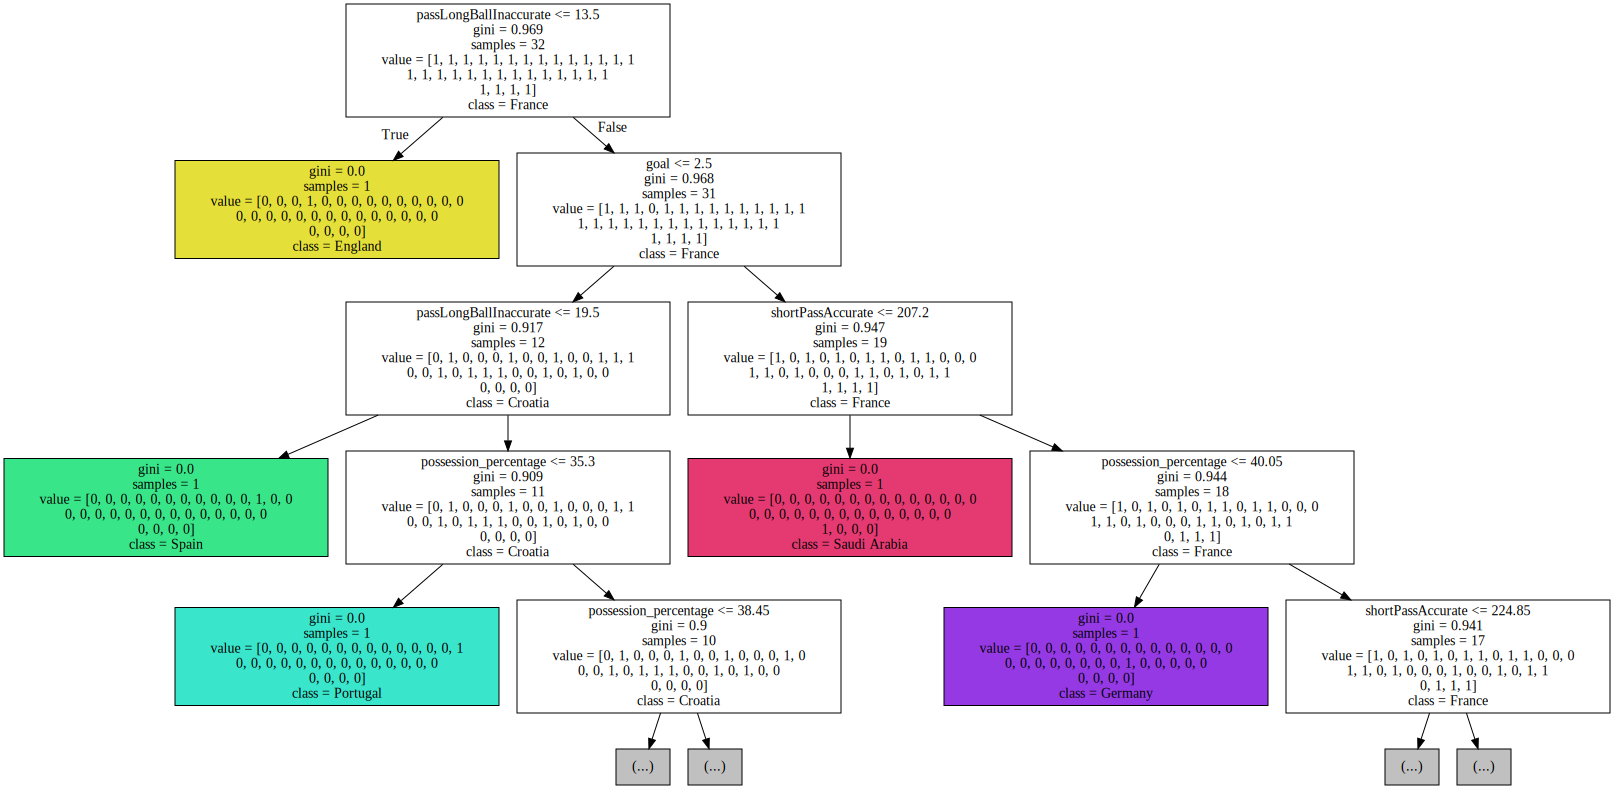

In [8]:
labels = ranking_table_X.columns

graph = Source(tree.export_graphviz(tree_clf ,feature_names = labels, class_names = ranking_table_y.unique(), max_depth = 4, filled = True))
display(SVG(graph.pipe(format='svg')))



131863

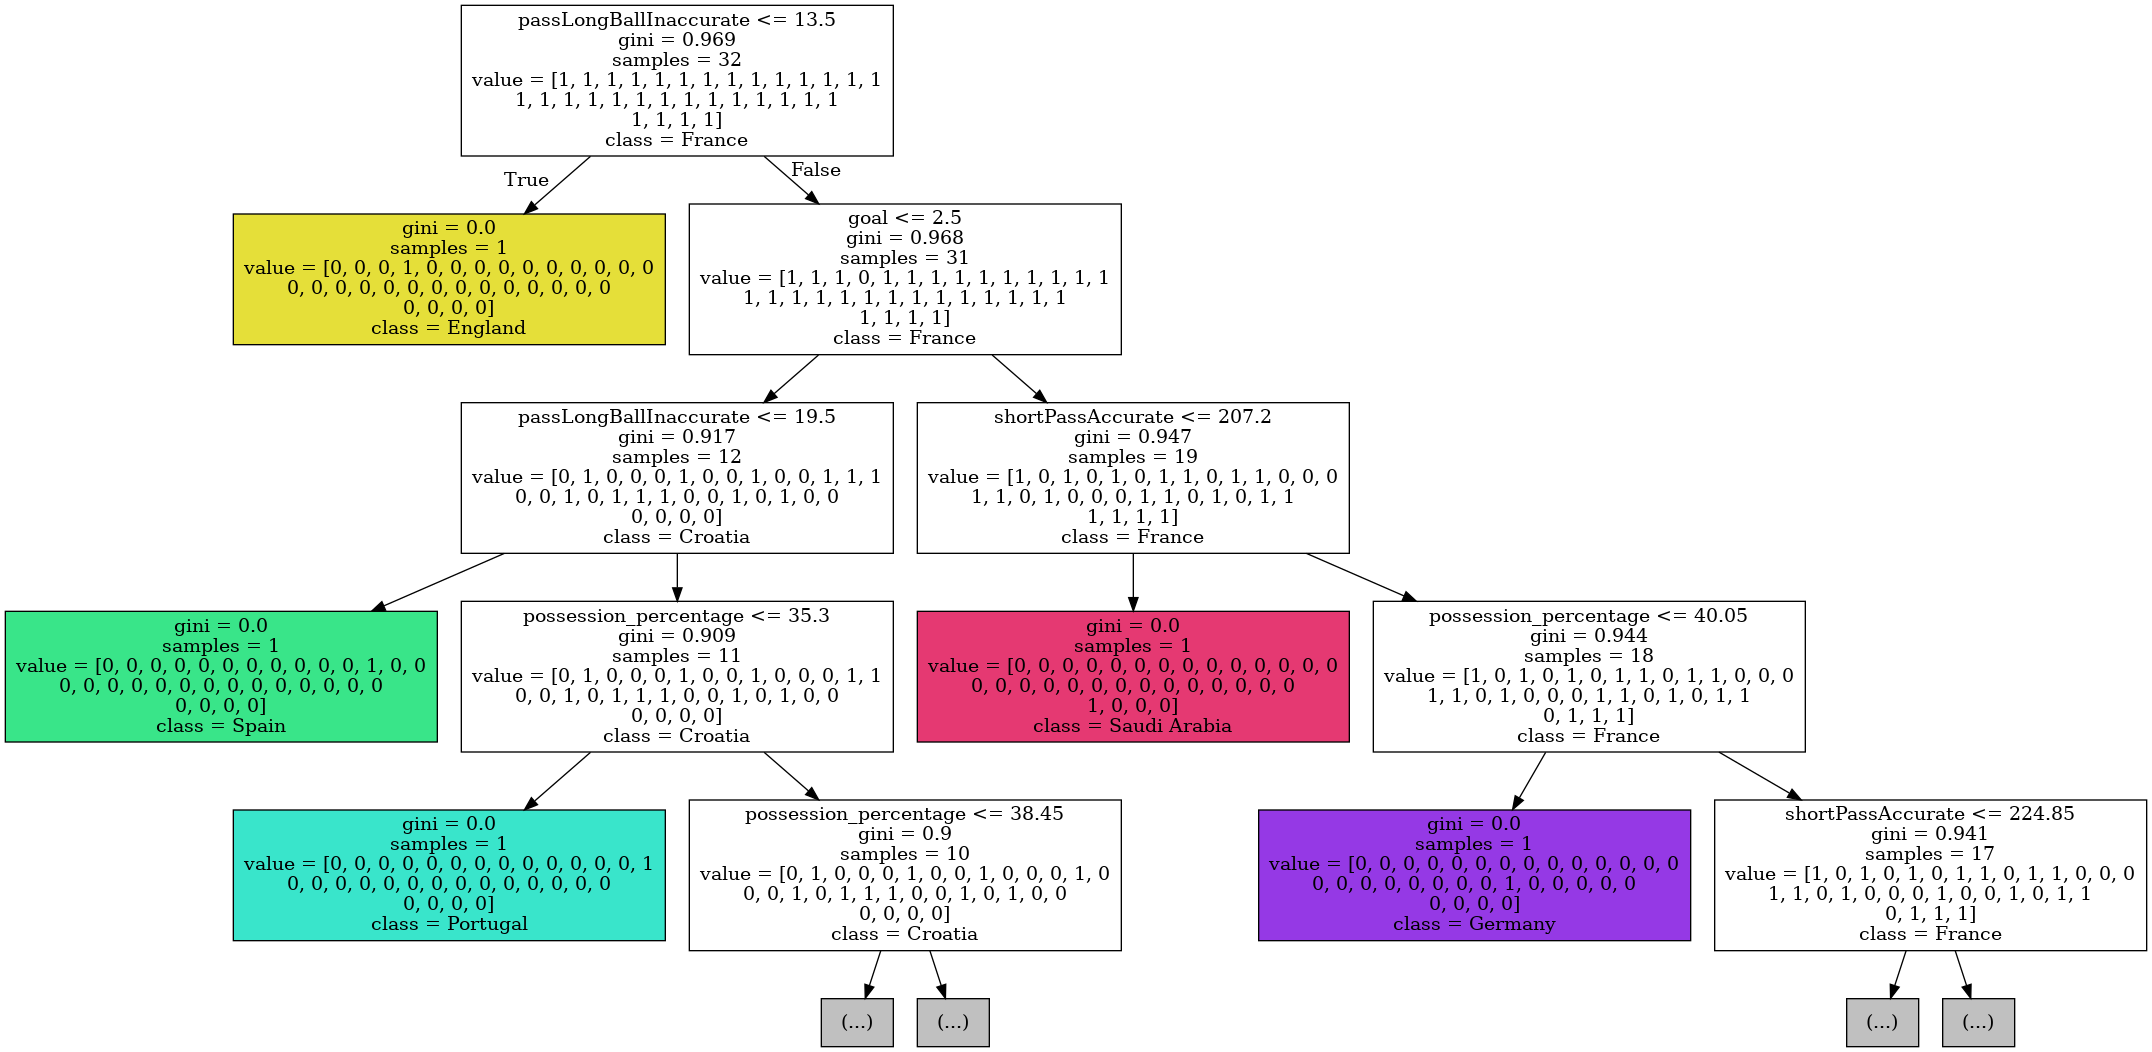

<Figure size 432x288 with 0 Axes>

In [6]:
#code to visualise the decision tree and export it in png format
#code source: 
#https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

plt.savefig("Decision_Tree.png")